In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [32]:
class RollingWindowPerceptron:
    def __init__(self, M=2000, n=0.5, p=4, expected=0, eps=1e-5):
        self.M = M
        self.n = n
        self.p = p
        self.eps = eps
        self.w = np.zeros((p + 1,))
        self.w[0] = expected
        
    def _quad_error(self, diffs):
        s = sum([math.pow(x, 2) for x in diffs])
        e = math.sqrt(s)
        return e
    
    @staticmethod
    def mse(sigmas):
        return np.sqrt((sigmas**2).sum())
        
    def fit(self, X, y): 
        epoch = 0
        curr_error = None
        while epoch < self.M or (epoch > self.M and curr_error > self.eps):
            errors = []
            for s, target in zip(X,y):
                s = [1] + s
                net = sum([s[i] * self.w[i] for i in range(len(s))])
               
                sigma = target - net
                errors.append(sigma)
                if sigma != 0:
                    for i in range(len(s)):
                        self.w[i] += self.n * sigma * s[i]
                        
                epoch += 1
                if epoch == self.M:
                    break
            print(np.clip(errors, -1.,1.))
            curr_error = self._quad_error(errors)
            
    def predict(self, x):
        X = [1] + x[len(x) - self.p:]
        return sum([X[i]*self.w[i] for i in range(len(X))])
    

# График исходной функции на интервале [a, b]

In [33]:
def func(t):
    return np.cos(t)**2 - 0.05

In [34]:
N = 20
a = -1
b = 0.5
p = 4

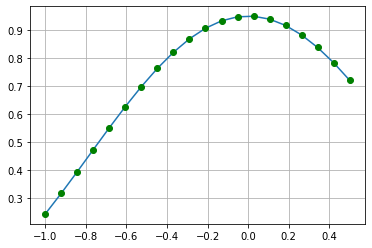

In [35]:
t1 = np.linspace(a, b, num=N)
x1 = func(t1)

plt.plot(t1, x1)
plt.plot(t1, x1, 'go')
plt.grid(True)

# Прогноз функции при M=2000 на интервале (b, 2b-a]

In [36]:
X_train = np.array([x1[shift:shift+p] for shift in range(x1.size-p)])
y_train = [x1[i] for i in range(p, x1.size)]

In [37]:
perceptron = RollingWindowPerceptron()
perceptron.fit(X_train, y_train)

pred_t = list(set(t2) - set(t1))
pred_t.sort()
pred_x = []
work_x = [] + x1
for i in range(len(x2) - len(x1)):
    pred = perceptron.predict(work_x)
    pred_x.append(pred)
    work_x.append(pred)

[ 0.55049835 -1.          1.         -1.          1.         -1.
  1.         -1.          1.         -1.          1.         -1.
  1.         -1.          1.         -1.        ]
[ 1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.]
[ 1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.]
[ 1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.]
[ 1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.]
[ 1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.]
[ 1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.]
[ 1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.]
[ 1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.]
[ 1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.]
[ 1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.]
[ 1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.]
[ 1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.]
[ 1. -1.  1. -1.  1. -1.  1.

OverflowError: math range error

In [ ]:
plt.plot(t2, x2)
plt.plot(pred_t, pred_x, 'ro')
plt.grid(True)

# Прогноз функции при M=4000 на интервале (b, 2b-a]

In [ ]:
perceptron = RollingWindowPerceptron(M=4000)
perceptron.fit(x2)

pred_t = list(set(t2) - set(t1))
pred_t.sort()
pred_x = []
work_x = [] + x1
for i in range(len(x2) - len(x1)):
    pred = perceptron.predict(work_x)
    pred_x.append(pred)
    work_x.append(pred)

In [ ]:
plt.plot(t2, x2)
plt.plot(pred_t, pred_x, 'ro')
plt.grid(True)

# Зависимость ошибки от различной ширины окна

In [ ]:
errors = []
for p_i in range(0, 8): #TODO: до 15-20, когда будет исправлена ошибка с оверфлоу (сейчас оверфлоу при 8)
    perceptron = RollingWindowPerceptron(p=p_i)
    perceptron.fit(x2)
    
    work_x = [] + x1
    for i in range(len(x2) - len(x1)):
        pred = perceptron.predict(work_x)
        work_x.append(pred)
    diffs = [work_x[i] - x2[i] for i in range(len(work_x))]
    errors.append(perceptron._quad_error(diffs))

In [ ]:
plt.plot(errors)
plt.grid(True)

# Зависимость ошибки от различной нормы обучения

In [ ]:
errors = []
n_range = list(np.arange(0.1, 0.91, 0.01))
for n_i in n_range: #TODO: до 1, когда будет исправлена ошибка с оверфлоу (сейчас оверфлоу при 0.9)
    perceptron = RollingWindowPerceptron(n=n_i)
    perceptron.fit(x2)
    
    work_x = [] + x1
    for i in range(len(x2) - len(x1)):
        pred = perceptron.predict(work_x)
        work_x.append(pred)
    diffs = [work_x[i] - x2[i] for i in range(len(work_x))]
    errors.append(perceptron._quad_error(diffs))

In [ ]:
plt.plot(n_range, errors)
plt.grid(True)